# Toyota 자동차 - 중고차 가격

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# 한글처리
plt.rcParams['font.family'] = 'Malgun Gothic'
# 음수처리
plt.rcParams['axes.unicode_minus'] = False


import warnings
warnings.filterwarnings('ignore')

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [4]:
toyota_df = pd.read_csv("./dataset/ToyotaCorolla.csv")
toyota_df.head()

,Id,Model,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,10,2002,46986,Diesel,90,1,...,1,1,1,0,0,0,1,0,0,0
1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,10,2002,72937,Diesel,90,1,...,1,0,1,0,0,0,1,0,0,0
2,3,?TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,9,2002,41711,Diesel,90,1,...,0,0,1,0,0,0,1,0,0,0
3,4,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,7,2002,48000,Diesel,90,0,...,0,0,1,0,0,0,1,0,0,0
4,5,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,3,2002,38500,Diesel,90,0,...,1,1,1,0,1,0,1,0,0,0


In [5]:
toyota_df.shape

(1436, 37)

#### 범주형 변수 ==> 이산형 변수 

In [7]:
toyota_df['Fuel_Type'].unique()

array(['Diesel', 'Petrol', 'CNG'], dtype=object)

###### Pandas 함수 :: get_dummies() > 원-핫 인코딩

In [10]:
Fuel = pd.get_dummies(toyota_df['Fuel_Type'])

#### 사용하지 않는 변수 제거

In [11]:
toyota_df1 = toyota_df.drop(columns=['Id', 'Model', 'Fuel_Type'])

toyota_corolla = pd.concat([toyota_df1, Fuel], 1)

In [12]:
toyota_corolla.head()

,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,HP,Met_Color,Automatic,cc,Doors,...,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar,CNG,Diesel,Petrol
0,13500,23,10,2002,46986,90,1,0,2000,3,...,0,0,0,1,0,0,0,0,1,0
1,13750,23,10,2002,72937,90,1,0,2000,3,...,0,0,0,1,0,0,0,0,1,0
2,13950,24,9,2002,41711,90,1,0,2000,3,...,0,0,0,1,0,0,0,0,1,0
3,14950,26,7,2002,48000,90,0,0,2000,3,...,0,0,0,1,0,0,0,0,1,0
4,13750,30,3,2002,38500,90,0,0,2000,3,...,0,1,0,1,0,0,0,0,1,0


In [13]:
import statsmodels.api as sm

In [14]:
# 상수항 추가
toyota_corolla = sm.add_constant(toyota_corolla, has_constant="add")

In [15]:
toyota_corolla.head()

,const,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,HP,Met_Color,Automatic,cc,...,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar,CNG,Diesel,Petrol
0,1.0,13500,23,10,2002,46986,90,1,0,2000,...,0,0,0,1,0,0,0,0,1,0
1,1.0,13750,23,10,2002,72937,90,1,0,2000,...,0,0,0,1,0,0,0,0,1,0
2,1.0,13950,24,9,2002,41711,90,1,0,2000,...,0,0,0,1,0,0,0,0,1,0
3,1.0,14950,26,7,2002,48000,90,0,0,2000,...,0,0,0,1,0,0,0,0,1,0
4,1.0,13750,30,3,2002,38500,90,0,0,2000,...,0,1,0,1,0,0,0,0,1,0


### 데이터 셋 분리 - 학습 / 테스트 데이터

In [16]:
X_data = toyota_corolla.drop(columns=['Price'])
y_data = toyota_corolla['Price']

In [17]:
X_data.columns

Index(['const', 'Age_08_04', 'Mfg_Month', 'Mfg_Year', 'KM', 'HP', 'Met_Color',
       'Automatic', 'cc', 'Doors', 'Cylinders', 'Gears', 'Quarterly_Tax',
       'Weight', 'Mfr_Guarantee', 'BOVAG_Guarantee', 'Guarantee_Period', 'ABS',
       'Airbag_1', 'Airbag_2', 'Airco', 'Automatic_airco', 'Boardcomputer',
       'CD_Player', 'Central_Lock', 'Powered_Windows', 'Power_Steering',
       'Radio', 'Mistlamps', 'Sport_Model', 'Backseat_Divider', 'Metallic_Rim',
       'Radio_cassette', 'Tow_Bar', 'CNG', 'Diesel', 'Petrol'],
      dtype='object')

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.3, random_state=156)

In [19]:
train_model_fit = sm.OLS(y_train, X_train).fit()

In [20]:
train_model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.912
Model:                            OLS   Adj. R-squared:                  0.909
Method:                 Least Squares   F-statistic:                     304.4
Date:                Wed, 17 Aug 2022   Prob (F-statistic):               0.00
Time:                        15:51:45   Log-Likelihood:                -8418.4
No. Observations:                1005   AIC:                         1.690e+04
Df Residuals:                     971   BIC:                         1.707e+04
Df Model:                          33                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -0.0091      0.001    -15.116      0.000      -0.010      -0.008
Age_08_04         -115.2100      3.991    -28.867      0.000    -123.042    -107.378
Mfg_Month          -96.9936     10.652     -9.106      0.000    -117.897     -76.091
Mfg_Year            -0.6059      0.935     -0.648      0.517      -2.440       1.228
KM                  -0.0170      0.001    -12.823      0.000      -0.020      -0.014
HP                  13.1382      3.704      3.547      0.000       5.869      20.407
Met_Color          -73.5491     76.717     -0.959      0.338    -224.100      77.002
Automatic          201.3095    160.928      1.251      0.211    -114.496     517.115
cc                  -0.0658      0.076     -0.867      0.386      -0.215       0.083
Doors               37.1714     42.709      0.870      0.384     -46.641     120.984
Cylinders           -0.0365      0.002    -15.116      0.000      -0.041      -0.032
Gears              288.8070    200.124      1.443      0.149    -103.919     681.533
Quarterly_Tax       10.8998      1.900      5.737      0.000       7.172      14.628
Weight              13.5187      1.529      8.840      0.000      10.518      16.520
Mfr_Guarantee      251.4368     75.265      3.341      0.001     103.736     399.138
BOVAG_Guarantee    488.0830    129.495      3.769      0.000     233.960     742.206
Guarantee_Period    58.3430     13.577      4.297      0.000      31.699      84.987
ABS               -258.9086    129.515     -1.999      0.046    -513.071      -4.746
Airbag_1           166.0755    254.421      0.653      0.514    -333.203     665.355
Airbag_2          -148.3031    131.875     -1.125      0.261    -407.095     110.489
Airco              320.7073     91.208      3.516      0.000     141.719     499.695
Automatic_airco   2356.2134    194.500     12.114      0.000    1974.524    2737.902
Boardcomputer     -182.5524    120.944     -1.509      0.132    -419.893      54.789
CD_Player          243.5870    103.123      2.362      0.018      41.217     445.957
Central_Lock       -83.7407    156.736     -0.534      0.593    -391.322     223.840
Powered_Windows    300.5367    156.209      1.924      0.055      -6.010     607.084
Power_Steering      56.1153    284.074      0.198      0.843    -501.355     613.585
Radio             1370.7371    775.113      1.768      0.077    -150.353    2891.827
Mistlamps          -89.6491    109.714     -0.817      0.414    -304.953     125.655
Sport_Model        312.9580     92.004      3.402      0.001     132.408     493.508
Backseat_Divider  -232.8277    129.333     -1.800      0.072    -486.632      20.976
Metallic_Rim       234.7035     97.092      2.417      0.016      44.170     425.237
Radio_cassette   -1478.5349    773.040     -1.913      0.056   -2995.557      38.488
Tow_Bar           -192.

In [22]:
# 학습 데이터 예측치
pred_y = train_model_fit.predict(X_train)

In [23]:
#학습 데이터 잔차 ( 실제값 - 추정치 )
res = train_model_fit.resid

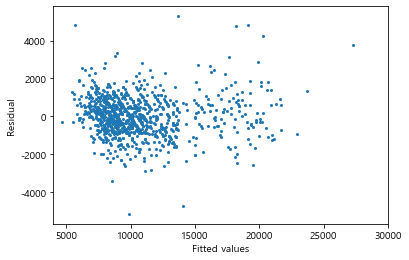

In [25]:
plt.scatter(pred_y, res, s=4)
plt.xlim(4000, 30000)
plt.xlabel('Fitted values')
plt.ylabel('Residual')
plt.show()

In [29]:
# 테스트 데이터 예측
pred_y2 = train_model_fit.predict(X_test)

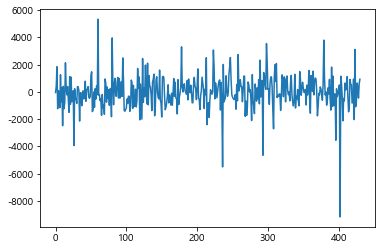

In [30]:
plt.plot(np.array(y_test-pred_y2))

### 사이킷-런

In [34]:
toyota_corolla = pd.concat([toyota_df1, Fuel], 1)

In [35]:
lr = LinearRegression()

In [36]:
lr.fit(X_train, y_train)

LinearRegression()

In [37]:
lr.intercept_

-36163.79286696841

In [38]:
lr.coef_

array([-7.37833743e-09, -1.13706727e+02, -9.54903850e+01,  1.74330926e+01,
       -1.70383394e-02,  1.31381751e+01, -7.35490609e+01,  2.01309499e+02,
       -6.57556948e-02,  3.71713788e+01,  6.82121026e-13,  2.88806955e+02,
        1.08998362e+01,  1.35187449e+01,  2.51436797e+02,  4.88082965e+02,
        5.83430119e+01, -2.58908616e+02,  1.66075538e+02, -1.48303130e+02,
        3.20707263e+02,  2.35621337e+03, -1.82552382e+02,  2.43587015e+02,
       -8.37407095e+01,  3.00536679e+02,  5.61153424e+01,  1.37073710e+03,
       -8.96491300e+01,  3.12958013e+02, -2.32827700e+02,  2.34703465e+02,
       -1.47853492e+03, -1.92467678e+02, -8.57709101e+02, -2.17944039e+02,
        1.07565314e+03])

In [39]:
y_pred = lr.predict(X_test)

In [41]:
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

In [43]:
print('MSE :: {0:.3f}'.format(mse))
print('RMSE :: {0:.3f}'.format(rmse))
print('R2 :: {0:.3f}'.format(r2_score(y_test, y_pred)))

MSE :: 1487505.826
RMSE :: 1219.633
R2 :: 0.898


In [44]:
lr.score(X_test, y_test)

0.8975054391019354

In [45]:
lr.score(X_train, y_train)

0.9118639280998729